In [1]:
import pandas as pd
import re

def camel_to_snake(text):
    under_scorer_1 = re.compile(r'(.)([A-Z][a-z]+)')
    under_scorer_2 = re.compile('([a-z0-9])([A-Z])')

    subbed = under_scorer_1.sub(r'\1_\2', text)
    return under_scorer_2.sub(r'\1_\2', subbed).lower()


def get_df(path, na_values=None, nrows=None):
    # Get column names of DF
    column_name_list = list(pd.read_csv(path, nrows=1).columns)
    
    for c_idx in range(len(column_name_list)):
        # Convert camel to snake
        c_name = camel_to_snake(column_name_list[c_idx])

        # remove bracket
        pattern = re.compile(r'\([^)]*\)| +|-+')
        c_name = pattern.sub('_', c_name)

        # Remove duplicate _
        pattern = re.compile(r'_+')
        c_name = pattern.sub('_', c_name)

        # Strip _
        c_name = c_name.strip('_')
        column_name_list[c_idx] = c_name
        
    df = pd.read_csv(path, na_values=na_values, nrows=nrows)
    # Change column names
    df.columns = column_name_list
    return df

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc(
    'axes',
    labelweight='bold',
    labelsize='large',
    titleweight='bold',
    titlesize=14,
    titlepad=10,
)

accidents = get_df('input_data/accidents.csv', nrows=20000, na_values='?')
autos = get_df('input_data/autos.csv', na_values='?')
concrete = get_df('input_data/concrete.csv', na_values='?')
customer = get_df('input_data/customer.csv', na_values='?')

In [3]:
autos["stroke_ratio"] = autos.stroke / autos.bore
autos[["stroke", "bore", "stroke_ratio"]].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


In [4]:
import numpy as np

# Change autos.num_of_cylinders feature to int64 type
num_list = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve']
autos.num_of_cylinders = autos.num_of_cylinders.map(lambda noc: num_list.index(noc))

# Add displacement feature
autos["displacement"] = (
    np.pi * ((0.5 * autos.bore) ** 2) * autos.stroke * autos.num_of_cylinders
)
autos[["stroke", "bore", "num_of_cylinders", "displacement"]].head()

,stroke,bore,num_of_cylinders,displacement
0,2.68,3.47,4,101.377976
1,2.68,3.47,4,101.377976
2,3.47,2.68,6,117.446531
3,3.40,3.19,4,108.695147
4,3.40,3.19,5,135.868934


<AxesSubplot:xlabel='log_wind_speed', ylabel='Density'>

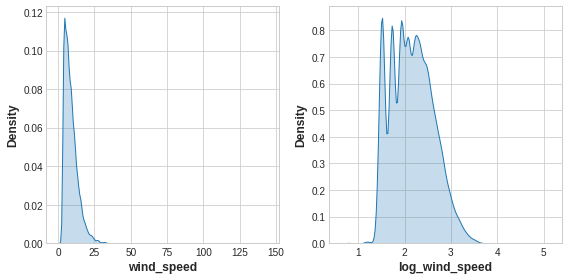

In [6]:
import seaborn as sns

# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
accidents['log_wind_speed'] = accidents.wind_speed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(accidents.wind_speed, shade=True, ax=axs[0])
sns.kdeplot(accidents.log_wind_speed, shade=True, ax=axs[1])

In [9]:
roadway_features = [
    "amenity", "bump", "crossing", "give_way", "junction", 
    "no_exit", "railway", "roundabout", "station", "stop",
    "traffic_calming", "traffic_signal"
]
accidents["roadway_features"] = accidents[roadway_features].sum(axis=1)

accidents[roadway_features + ["roadway_features"]].head(10)

,amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,roadway_features
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,True,1
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,True,1
5,False,False,False,False,False,False,False,False,False,False,False,False,0
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,False,False,False,False,False,False,False,False,False,False,0
8,False,False,False,False,False,False,False,False,False,False,False,False,0
9,False,False,False,False,False,False,False,False,False,False,False,False,0


In [10]:
concrete.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'compressive_strength'],
      dtype='object')

In [11]:
components = [
    "cement", "blast_furnace_slag", "fly_ash", "water", "superplasticizer", 
    "coarse_aggregate", "fine_aggregate"
]
concrete["components"] = concrete[components].gt(0).sum(axis=1)
concrete[components + ["components"]].head(10)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


In [13]:
customer[["type", "level"]] = (
    customer["policy"].str.split(" ", expand=True)
)
customer[["policy", "type", "level"]].head(10)

,policy,type,level
0,Corporate L3,Corporate,L3
1,Personal L3,Personal,L3
2,Personal L3,Personal,L3
3,Corporate L2,Corporate,L2
4,Personal L1,Personal,L1
5,Personal L3,Personal,L3
6,Corporate L3,Corporate,L3
7,Corporate L3,Corporate,L3
8,Corporate L3,Corporate,L3
9,Special L2,Special,L2


In [14]:
autos["make_and_style"] = autos["make"] + "_" + autos["body_style"]
autos[["make", "body_style", "make_and_style"]].head()

,make,body_style,make_and_style
0,alfa-romero,convertible,alfa-romero_convertible
1,alfa-romero,convertible,alfa-romero_convertible
2,alfa-romero,hatchback,alfa-romero_hatchback
3,audi,sedan,audi_sedan
4,audi,sedan,audi_sedan


In [15]:
customer["average_income"] = (
    customer.groupby("state")["income"].transform("mean")
)
customer[["state", "income", "average_income"]].head(10)

,state,income,average_income
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


In [17]:
customer["state_freq"] = (
    customer.groupby("state")["state"].transform("count") / customer.state.count()
)
customer[["state", "state_freq"]].head(10)

,state,state_freq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


In [20]:
customer.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employment_status', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'type', 'level', 'average_income',
       'state_freq'],
      dtype='object')

In [21]:
# Create splits
df_train = customer.sample(frac=0.5)
df_valid = customer.drop(df_train.index)

# Create the average claim amount by coverage type, on the training set
df_train["average_claim"] = df_train.groupby("coverage")["total_claim_amount"].transform("mean")

# Merge the values into the validation set
df_valid = df_valid.merge(
    df_train[["coverage", "average_claim"]].drop_duplicates(),
    on="coverage",
    how="left",
)

df_valid[["coverage", "average_claim"]].head(10)

,coverage,average_claim
0,Basic,378.730903
1,Extended,488.592480
2,Basic,378.730903
3,Basic,378.730903
4,Extended,488.592480
5,Basic,378.730903
6,Basic,378.730903
7,Basic,378.730903
8,Basic,378.730903
9,Premium,638.606522
